# Audio Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


## Setup pyaudio

In [2]:
import pyaudio

CHUNK_SIZE = 1024 * 4 # how many audio samples per frame
FORMAT = pyaudio.paInt16 # 16 bit audio format in bits
CHANNELS = 1
RATE = 44100 # samples per second : 44.1 KHz

# Port audio interface on Pyaudio
p = pyaudio.PyAudio()

### Setup stream

In [3]:
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK_SIZE
)

### Read stream

In [4]:
bit_data = stream.read(CHUNK_SIZE) #this data is in bits. and python will display it in the hex format

print(bit_data)

b"\\\x00S\x00X\x00Q\x00S\x00Q\x00G\x00Q\x00E\x00J\x00P\x00N\x00\\\x00Z\x00H\x008\x00G\x00G\x00@\x00.\x00:\x008\x008\x003\x00>\x00*\x00*\x00'\x008\x00:\x00>\x007\x003\x001\x00'\x00!\x00'\x00%\x00!\x00%\x00\x11\x00\x10\x00\x18\x00\x13\x00#\x00.\x00\x1e\x00\x15\x00\x18\x00 \x00\x18\x00\x18\x00\n\x00\x15\x00\x18\x00,\x00\x1c\x00(\x00,\x001\x00.\x00@\x00:\x00A\x007\x00*\x00,\x000\x001\x00.\x00#\x00H\x00C\x00*\x00G\x00S\x00Q\x00C\x00A\x000\x00@\x007\x000\x00:\x00%\x001\x005\x00,\x00%\x00,\x00 \x00'\x003\x00#\x000\x00\x17\x00\x08\x00\x18\x00\x15\x00\x18\x00\x10\x00\x15\x00\x10\x00\x0e\x00\x1a\x00\n\x00\xf8\xff\x13\x00\x07\x00\x03\x00\x10\x00\x0e\x00\x15\x00\x15\x00\x10\x00%\x00\x13\x00 \x00(\x00,\x00(\x00>\x00G\x00#\x00!\x00!\x007\x001\x007\x00:\x00.\x00#\x00\x1c\x00\n\x00\x18\x00\x13\x00\n\x00\x05\x00\xfa\xff\x05\x00\xf7\xff\xf8\xff\xf7\xff\xee\xff\x01\x00\xfc\xff\xf5\xff\xee\xff\xf1\xff\xef\xff\xf3\xff\x01\x00\xfc\xff\xfa\xff\xf5\xff\x01\x00\xfa\xff\xfe\xff\xea\xff\xf7\xff\x03\x00\xfc\xff\x

In [5]:
len(bit_data) #original chunksize is 4096

8192

### Unpack bit data

[struct lib](https://docs.python.org/2/library/struct.html)

In [6]:
import struct
data_int = struct.unpack(f"{CHUNK_SIZE}h",bit_data) #h for signed integer of 2 bytes(16 bits)

In [25]:
np.frombuffer(bit_data, dtype = np.int16) 

array([-22, -18, -33, ..., -61, -59, -66], dtype=int16)

## Plot data

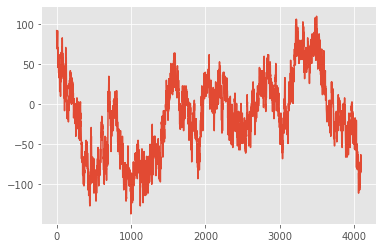

In [7]:
%matplotlib inline 
fig, ax = plt.subplots()

ax.plot(data_int)

plt.show()

## Live audio setup

### Live in tkinter

`%matplotlib tk` will open tkinter window for better live

In [28]:
import numpy as np
import pyaudio
import struct
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

%matplotlib tk

CHUNK_SIZE = 1024 * 4 # how many audio samples per frame
FORMAT = pyaudio.paInt16 # 16 bit audio format in bits
CHANNELS = 1
RATE = 44100 # samples per second : 44.1 KHz

# Port audio interface on Pyaudio
p = pyaudio.PyAudio()


stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK_SIZE
)

fig, ax = plt.subplots()

ax.set_ylim(-2**15 ,2**15)
line, = ax.plot(range(CHUNK_SIZE),range(CHUNK_SIZE))



while True:
    try:
        bit_data = stream.read(CHUNK_SIZE) 
        data_int = np.frombuffer(bit_data, dtype = np.int16)  #h for signed integer of 2 bytes(16 bits)

        line.set_ydata(data_int)
        fig.canvas.draw()
        fig.canvas.flush_events()
    except Exception as e:
        print(e)
        break

invalid command name "pyimage130"


### Live in browser

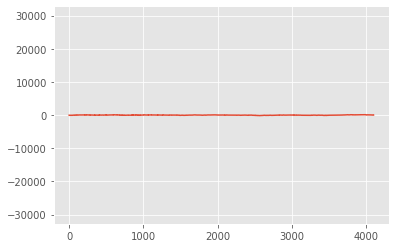

In [40]:
import numpy as np
import pyaudio
import struct
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import animation
from IPython import display

style.use('ggplot')

%matplotlib inline

fig, ax = plt.subplots()

ax.set_ylim(-2**15 ,2**15)
line, = ax.plot(range(CHUNK_SIZE),range(CHUNK_SIZE))


def draw_frame(n):
    bit_data = stream.read(CHUNK_SIZE) 
    data_int = np.frombuffer(bit_data, dtype = np.int16)  #h for signed integer of 2 bytes(16 bits)

    line.set_ydata(data_int)
    return (line,)

anim = animation.FuncAnimation(fig, draw_frame, frames=500, interval=100, blit=True)

display.HTML(anim.to_html5_video())

## FFT processing & Power Spectral Density

### Live in tkinter

In [3]:
import numpy as np
import pyaudio
import struct
import matplotlib.pyplot as plt
from matplotlib import style

style.use('dark_background')

%matplotlib tk

CHUNK_SIZE = 1024 * 4 # how many audio samples per frame
FORMAT = pyaudio.paInt16 # 16 bit audio format in bits
CHANNELS = 1
RATE = 44100 # samples per second : 44.1 KHz

# Port audio interface on Pyaudio
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK_SIZE
)

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2,2,(1,2))
ax2 = fig.add_subplot(2,2,(3,4))


ax1.set_ylim(-2**15 ,2**15)
ax2.set_ylim(0,1e10)

ax1.set_title('Audio Signal')
ax2.set_title('Power Spectral Density')

n = int(np.floor(CHUNK_SIZE/2))

line1, = ax1.plot(range(CHUNK_SIZE),range(CHUNK_SIZE))
line2, = ax2.plot(range(n),range(n))    

while True:
    try:
        bit_data = stream.read(CHUNK_SIZE) 
        data_int = np.frombuffer(bit_data, dtype = np.int16)  #h for signed integer of 2 bytes(16 bits)
        
        f_hat = np.fft.fft(data_int,CHUNK_SIZE)
        psd = (f_hat * np.conjugate(f_hat) / CHUNK_SIZE).real
        
        line1.set_ydata(data_int)
        line2.set_ydata(psd[:n])
        
        fig.canvas.draw()
        fig.canvas.flush_events()
    except Exception as e:
        print(e)
        break

invalid command name "pyimage11"


### Live in browser

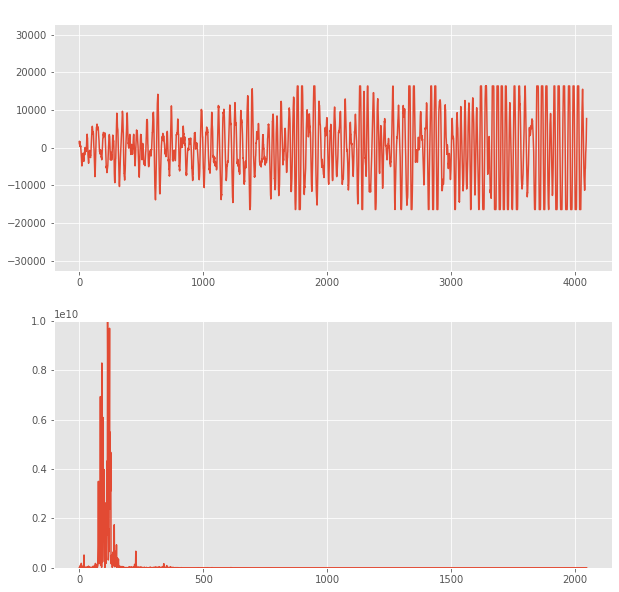

In [6]:
import numpy as np
import pyaudio
import struct
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import animation
from IPython import display

style.use('ggplot')

%matplotlib inline


CHUNK_SIZE = 1024 * 4 # how many audio samples per frame
FORMAT = pyaudio.paInt16 # 16 bit audio format in bits
CHANNELS = 1
RATE = 44100 # samples per second : 44.1 KHz

# Port audio interface on Pyaudio
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK_SIZE
)

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,(1,2))
ax2 = fig.add_subplot(2,2,(3,4))


ax1.set_ylim(-2**15 ,2**15)
ax2.set_ylim(0,1e10)

ax1.set_title('Audio Signal')
ax2.set_title('Power Spectral Density')

m = int(np.floor(CHUNK_SIZE/2))

line1, = ax1.plot(range(CHUNK_SIZE),range(CHUNK_SIZE))
line2, = ax2.plot(range(m),range(m))    


def draw_frame(n):
    bit_data = stream.read(CHUNK_SIZE) 
    data_int = np.frombuffer(bit_data, dtype = np.int16)  #h for signed integer of 2 bytes(16 bits)

    f_hat = np.fft.fft(data_int,CHUNK_SIZE)
    psd = (f_hat * np.conjugate(f_hat) / CHUNK_SIZE).real

    line1.set_ydata(data_int)
    line2.set_ydata(psd[:m])

    return (line1,line2)

anim = animation.FuncAnimation(fig, draw_frame, frames=200, interval=100, blit=True)

display.HTML(anim.to_html5_video())